# Movies - Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('netflix.csv', lineterminator = '\n')

In [3]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [3]:
df['Genre'].head()   # only for first five data

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [4]:
df.duplicated().sum()

0

In [6]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


Exploration Summary:

🔸we have a dataframe consisting of 9827 rows and 9 columns.

🔸our dataset looks a bit tidy with no nans nor duplicated values.

🔸Release_Date column needs to be casted into date time and to extract only the year value.

🔸Overview , Original_Language and Poster-Url wouldn't be so useful  during analysis, so we'll drop them.

🔸There is noticable outliers in popularity column.

🔸Vote_Average better be categorised for proper analysis.

🔸Genre column has come separate values and white spaces that needs to ne handled and casted into category.Exploration summary

In [5]:
# converting release date format from object >>> (to) datetime format
df['Release_Date'] = pd.to_datetime(df['Release_Date'])

print(df['Release_Date'].dtypes)

datetime64[ns]


In [6]:
# here we're doing  >>>> excluding date and month from the date , we only want year
df['Release_Date'] = df['Release_Date'].dt.year

df['Release_Date'].dtypes   # now DATA TYPE >> int

dtype('int32')

In [9]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [7]:
# dropping the columns which are not required
cols = ['Overview','Original_Language','Poster_Url']

# Drop those columns from the DataFrame (axis=1 indicates columns)
df.drop(cols , axis = 1, inplace = True)

# Display the remaining column names
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [11]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


##### Categorizing Vote_Average column

We would cut the Vote_Average values and makes 4 categories : popular ,average, below_avg, non_popular to describe it more using categorize_col() function provided above.

In [8]:
import pandas as pd  # Make sure pandas is imported


def categorize_col(df, col, labels):


    # Define the bin edges using the column's statistical distribution (min, 25%, 50%, 75%, max)
 edges = [
        df[col].describe()['min'],   # Minimum value
        df[col].describe()['25%'],   # First quartile (Q1)
        df[col].describe()['50%'],   # Median (Q2)
        df[col].describe()['75%'],   # Third quartile (Q3)
        df[col].describe()['max']    # Maximum value
    ]

# Use pd.cut to segment and sort data values into bins with corresponding labels
    # `duplicates='drop'` ensures no error if some edges are equal (e.g., if min = Q1)
 df[col] = pd.cut(df[col], edges, labels=labels, duplicates='drop')

 return df  # Return the updated DataFrame

In [25]:
lables=['not_popular','below_avg','average','popular']

categorize_col(df,'Vote_Average',lables)

df['Vote_Average'].unique()

['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [23]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,popular,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,popular,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,below_avg,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,popular,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,average,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [24]:
# for counting how many type of movies do each variety have ?

df['Vote_Average'].value_counts()

Vote_Average
non_popular    2467
popular        2450
average        2412
below_avg      2398
Name: count, dtype: int64

In [26]:
# Remove all rows from the DataFrame that contain any NaN (missing) values
df.dropna(inplace=True)

# Check for remaining missing values in each column after dropping
# This will return a count of NaNs per column (should be 0 if all were removed)
df.isna().sum() 

Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Poster_Url           0
dtype: int64

In [27]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,popular,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,popular,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,below_avg,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,popular,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,average,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


##### we'd split genres into a list and then explode our dataframe to have only one genre per row for each movie

In [12]:
df['Genre'] = df['Genre'].str.split(',')

df = df.explode('Genre').reset_index(drop = True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction
3,2022,The Batman,3827.658,1151,8.1,Crime
4,2022,The Batman,3827.658,1151,8.1,Mystery


#### Casting column into category

In [40]:
# Convert the 'Genre' column to categorical data type
df['Genre'] = df['Genre'].astype('category')

# Check the data type of the 'Genre' column after conversion
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Action, Adventure',
                  'Action, Adventure, Animation',
                  'Action, Adventure, Animation, Comedy',
                  'Action, Adventure, Animation, Comedy, Family',
                  'Action, Adventure, Animation, Comedy, Romance',
                  'Action, Adventure, Animation, Crime, Family, Mystery',
                  'Action, Adventure, Animation, Drama',
                  'Action, Adventure, Animation, Family',
                  'Action, Adventure, Animation, Family, Comedy',
                  ...
                  'Western, Drama', 'Western, Drama, Action, Adventure',
                  'Western, Drama, Adventure', 'Western, Drama, Crime',
                  'Western, Drama, History', 'Western, Drama, Mystery',
                  'Western, History', 'Western, Horror',
                  'Western, Mystery, Thriller, Drama', 'Western, Thriller'],
, ordered=False, categories_dtype=object)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9727 entries, 0 to 9726
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  9727 non-null   object  
 1   Title         9727 non-null   object  
 2   Popularity    9727 non-null   float64 
 3   Vote_Count    9727 non-null   int64   
 4   Vote_Average  0 non-null      float64 
 5   Genre         9727 non-null   category
dtypes: category(1), float64(2), int64(1), object(2)
memory usage: 481.8+ KB


In [42]:
df.nunique()

Release_Date    5846
Title           9415
Popularity      8088
Vote_Count      3265
Vote_Average       0
Genre           2324
dtype: int64

In [ ]:
df.head(3)

##### DATA VISUALIZATION

In [45]:
sns.set_style("whitegrid")

#### Q1.What is the most frequent genre of moview released on netflix?

In [13]:
df['Genre'].describe()

count         25793
unique           38
top        Thriller
freq           1973
Name: Genre, dtype: object

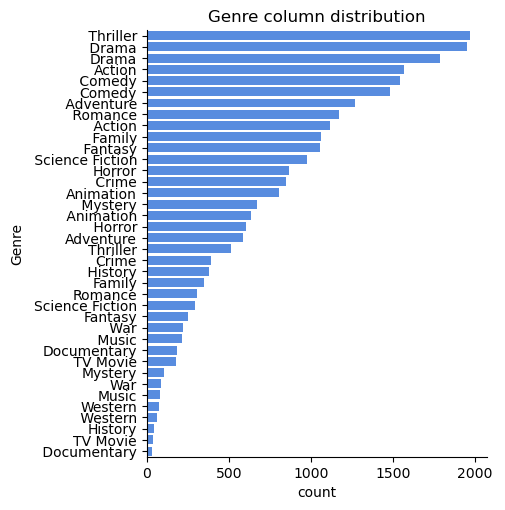

In [14]:
sns.catplot(y = 'Genre' , data = df , kind = 'count',
           order = df['Genre'].value_counts().index,
           color = '#4287f5')

plt.title('Genre column distribution')
plt.show()

#### Q2. Which has highest votes in vote avg column

In [15]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction
3,2022,The Batman,3827.658,1151,8.1,Crime
4,2022,The Batman,3827.658,1151,8.1,Mystery


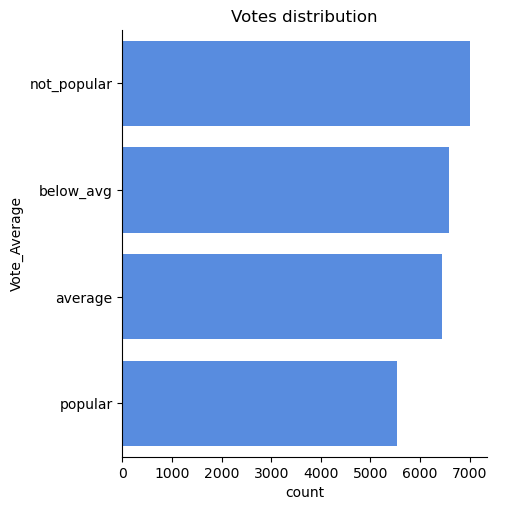

In [26]:
sns.catplot(y='Vote_Average',data=df,kind='count',
            order=df['Vote_Average'].value_counts().index,
            color='#4287f5')

plt.title('Votes distribution')
plt.show()

#### Q3 What movie got the highest popularity ? what's its genre ?

In [17]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction
3,2022,The Batman,3827.658,1151,8.1,Crime
4,2022,The Batman,3827.658,1151,8.1,Mystery


In [18]:

df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction


#### Q4 What movie got the lowest popularity ? what's its genre ?

In [19]:

df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction
3,2022,The Batman,3827.658,1151,8.1,Crime
4,2022,The Batman,3827.658,1151,8.1,Mystery


In [20]:
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25787,2021,The United States vs. Billie Holiday,13.354,152,6.7,Music
25788,2021,The United States vs. Billie Holiday,13.354,152,6.7,Drama
25789,2021,The United States vs. Billie Holiday,13.354,152,6.7,History
25790,1984,Threads,13.354,186,7.8,War
25791,1984,Threads,13.354,186,7.8,Drama
25792,1984,Threads,13.354,186,7.8,Science Fiction


#### Q5 Which year has the most filmmed movies ?

In [21]:

df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction
3,2022,The Batman,3827.658,1151,8.1,Crime
4,2022,The Batman,3827.658,1151,8.1,Mystery


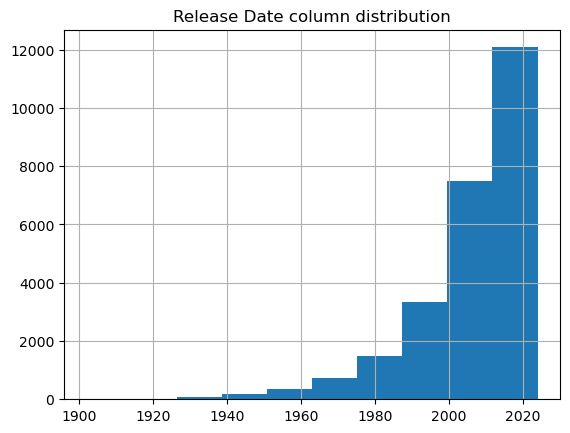

In [22]:
df['Release_Date'].hist()
plt.title('Release Date column distribution')
plt.show()

Conclusion

#### 01: What is the most frequent genre in the dataset?

Drama genre is the most frequent genre in our dataset and has appeared more than 14% of the times among 19 other genres.

#### Q2: What genres has highest votes?

we have 25.5% of our dataset with popular vote (6528 rows). Drama again gets the highest popularity among fans by being having more than 18.5%

#### Q3: What movie got the highest popularity? what's its genre?

Spider-Man: No Way Home has the highest popularity rate in our dataset and it has genres of Action, Adventure and Sience Fiction.

#### Q4: What movie got the lowest popularity? what's its genre?

The united states, thread' has the highest lowest rate in our dataset and it has genres of music, drama, 'war', 'sci-fi and his

#### 05: Which year has the most filmmed movies?

year 2020 has the highest filmming rate in our dataset.